## Descriptive

In [9]:
import data_processing
import feature_extraction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = data_processing.read_all_users('geolife_trajectories')
feature_df = pd.read_csv("mode_classification_features.csv")

[1/182] processing user 135
[2/182] processing user 132
[3/182] processing user 104
[4/182] processing user 103
[5/182] processing user 168
[6/182] processing user 157
[7/182] processing user 150
[8/182] processing user 159
[9/182] processing user 166
[10/182] processing user 161
[11/182] processing user 102
[12/182] processing user 105
[13/182] processing user 133
[14/182] processing user 134
[15/182] processing user 160
[16/182] processing user 158
[17/182] processing user 167
[18/182] processing user 151
[19/182] processing user 169
[20/182] processing user 156
[21/182] processing user 024
[22/182] processing user 023
[23/182] processing user 015
[24/182] processing user 012
[25/182] processing user 079
[26/182] processing user 046
[27/182] processing user 041
[28/182] processing user 048
[29/182] processing user 077
[30/182] processing user 083
[31/182] processing user 084
[32/182] processing user 070
[33/182] processing user 013
[34/182] processing user 014
[35/182] processing use

In [48]:
group_sizes_sorted = df.groupby('trajectory').size().sort_values(ascending=False)
print(group_sizes_sorted)

trajectory
20081219114010.plt    92645
20081001230824.plt    90274
20080930203247.plt    78868
20090124065103.plt    64483
20090706033310.plt    64168
                      ...  
20090419133349.plt        3
20081121110241.plt        3
20090312071253.plt        3
20120222005601.plt        3
20000101231219.plt        3
Length: 17784, dtype: int64


In [46]:
unique_trajectories = df['trajectory'].unique()
len(unique_trajectories)

17784

In [10]:
df

,lat,lon,alt,elapsed time,label,time,trajectory,user
0,40.006871,116.320977,84.0,39777.195949,bike,2008-11-25 04:42:10,16720081125014100.plt,37
1,40.006913,116.321023,71.0,39777.195972,bike,2008-11-25 04:42:12,16720081125014100.plt,37
2,40.006878,116.321002,69.0,39777.195995,bike,2008-11-25 04:42:14,16720081125014100.plt,37
3,40.006885,116.320996,74.0,39777.196019,bike,2008-11-25 04:42:16,16720081125014100.plt,37
4,40.006934,116.321002,75.0,39777.196042,bike,2008-11-25 04:42:18,16720081125014100.plt,37
...,...,...,...,...,...,...,...,...
794,39.978615,116.304728,0.0,40813.107130,bike,2011-09-27 02:34:16,02020110927021725.plt,20
795,39.978598,116.304693,0.0,40813.107141,bike,2011-09-27 02:34:17,02020110927021725.plt,20
796,39.978597,116.304672,0.0,40813.107153,bike,2011-09-27 02:34:18,02020110927021725.plt,20
797,39.978597,116.304652,0.0,40813.107164,bike,2011-09-27 02:34:19,02020110927021725.plt,20


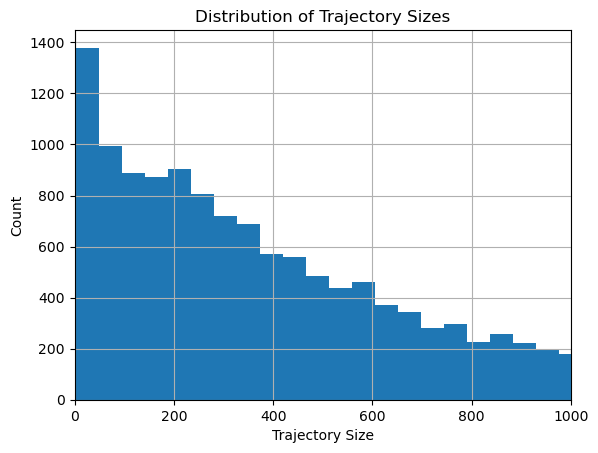

In [47]:
import matplotlib.pyplot as plt

df.groupby('trajectory').size().hist(bins=2000)
plt.xlabel('Trajectory Size')
plt.ylabel('Count')
plt.title('Distribution of Trajectory Sizes')

plt.xlim(0, 1000)
          
plt.show()

In [7]:
feature_df['label'].hist

<bound method hist_series of 0       bike
1       bike
2       walk
3       bike
4       bike
        ... 
4330    walk
4331    walk
4332    walk
4333     bus
4334    walk
Name: label, Length: 4335, dtype: object>

In [25]:
label_counts = feature_df['label'].value_counts()
print(label_counts)

label
walk     1534
bike      937
car       825
bus       733
train     306
Name: count, dtype: int64


In [68]:
len(df)

24876978

In [71]:
num_labeled= (df['label'] != 0).sum()
num_unlabeled = (df['label'] == 0).sum()
counts = [num_unlabeled, num_labeled]
labels = ['Unlabeled', 'Labeled']

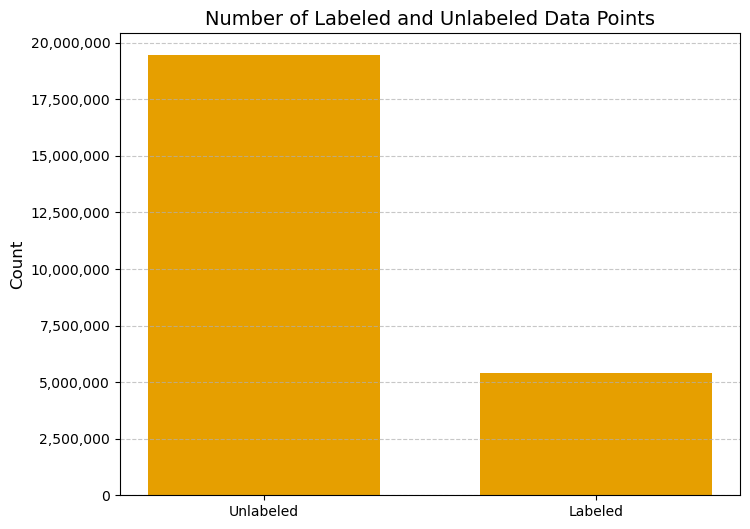

In [87]:
# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color='#E69F00',  width=0.7)

# Add title and labels
plt.title('Number of Labeled and Unlabeled Data Points', fontsize=14)
plt.ylabel('Count', fontsize=12)

# Format y-axis to show real numbers instead of scientific notation
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Show grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.savefig('Graphs/histogram_unlabelled.png', dpi=600, bbox_inches="tight")
# Show plot
plt.show()

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

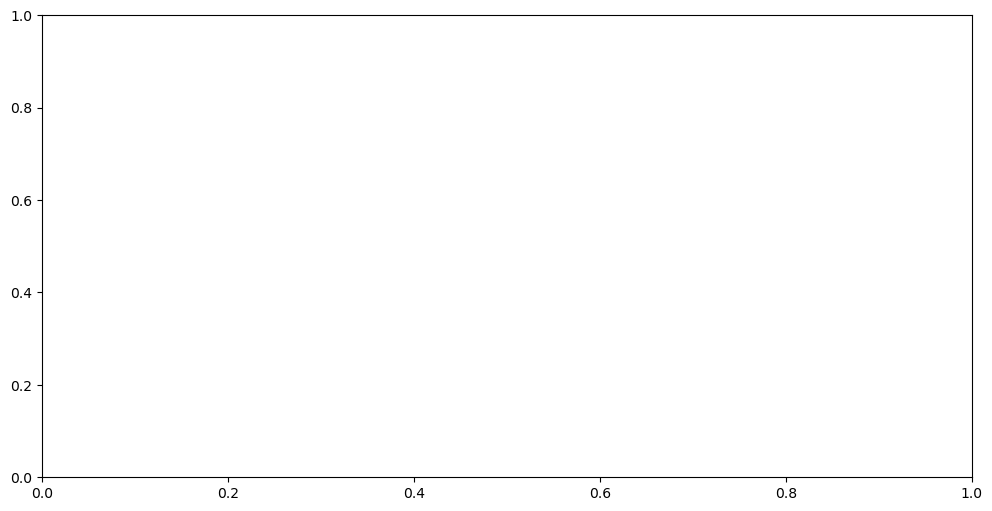

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Count occurrences of each transport mode
label_counts = df['label'].value_counts()

# Set figure size
plt.figure(figsize=(12, 6))

# Create a bar chart instead of a histogram
plt.bar(label_counts.index, label_counts.values, color='#E69F00', edgecolor='black', width=0.6)

# Add title and labels
plt.title('Frequency of Transport Modes', fontsize=14, fontweight='bold')
plt.ylabel('Number of Data Points', fontsize=12)

# Format y-axis to show real numbers instead of scientific notation
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Adjust label height by adding a **5% offset** of the maximum value
for i, count in enumerate(label_counts.values):
    plt.text(i, count + 0.01 * max(label_counts.values), f"{count:,}", 
             ha='center', fontsize=10, fontweight='bold')

# Ensure correct x-axis labels
plt.xticks(rotation=0, fontsize=10)  # Keep labels readable
plt.yticks(fontsize=10)

# Show grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.savefig('Graphs/histogram.png', dpi=600, bbox_inches="tight")
plt.show()

In [3]:
#df = data_processing.process_classes(df)
df = data_processing.drop_unlabelled(df)

In [4]:
df=data_processing.create_segments(df)
df

,lat,lon,alt,elapsed time,time,trajectory,label,user,segment
134,39.962098,116.301595,0.000000,39535.364236,2008-03-28 08:44:30,20080328075913.plt,bus,104,1
135,39.948270,116.303298,0.000000,39535.367014,2008-03-28 08:48:30,20080328075913.plt,bus,104,1
136,39.948220,116.303337,0.000000,39535.367049,2008-03-28 08:48:33,20080328075913.plt,bus,104,1
137,39.948120,116.303378,0.000000,39535.367118,2008-03-28 08:48:39,20080328075913.plt,bus,104,1
138,39.948110,116.303418,0.000000,39535.367153,2008-03-28 08:48:42,20080328075913.plt,bus,104,1
...,...,...,...,...,...,...,...,...,...
633,39.892109,116.328963,149.654629,40608.471296,2011-03-06 11:18:40,20110306101335.plt,walk,147,10120
634,39.892085,116.328959,149.924311,40608.471354,2011-03-06 11:18:45,20110306101335.plt,walk,147,10120
635,39.892074,116.328959,149.293596,40608.471412,2011-03-06 11:18:50,20110306101335.plt,walk,147,10120
636,39.892064,116.328959,149.058396,40608.471470,2011-03-06 11:18:55,20110306101335.plt,walk,147,10120


In [5]:
df=data_processing.calculations(df)
df

,lat,lon,alt,elapsed time,time,trajectory,label,user,segment,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration
137,39.948120,116.303378,0.000000,39535.367118,2008-03-28 08:48:39,20080328075913.plt,bus,104,1,0.011674,0.001946,6.0,-3.392017e-05,162.271799,12.694739,0.104603,2.115790,1.743089
138,39.948110,116.303418,0.000000,39535.367153,2008-03-28 08:48:42,20080328075913.plt,bus,104,1,0.003590,0.001197,3.0,-2.496606e-04,108.230072,54.041727,0.625892,-18.013909,-6.709900
139,39.947997,116.303410,0.000000,39535.367222,2008-03-28 08:48:48,20080328075913.plt,bus,104,1,0.012619,0.002103,6.0,1.510762e-04,183.253040,75.022968,0.431006,12.503828,5.086290
140,39.947952,116.303377,0.000000,39535.367280,2008-03-28 08:48:53,20080328075913.plt,bus,104,1,0.005753,0.001151,5.0,-1.905084e-04,209.566451,26.313411,0.827881,5.262682,-1.448229
141,39.947902,116.303405,0.000000,39535.367338,2008-03-28 08:48:58,20080328075913.plt,bus,104,1,0.006064,0.001213,5.0,1.244359e-05,156.469520,53.096931,0.051301,-10.619386,-3.176414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,39.984650,116.182117,1158.136483,39374.292743,2007-10-19 07:01:33,20071019052429.plt,walk,114,10119,0.050993,0.000279,183.0,-5.066597e-07,204.689674,49.552053,0.332744,-0.270776,-0.002049
634,39.892085,116.328959,149.924311,40608.471354,2011-03-06 11:18:45,20110306101335.plt,walk,147,10120,0.002690,0.000538,5.0,5.346438e-05,187.287185,120.738584,0.496805,-24.147717,-35.632120
635,39.892074,116.328959,149.293596,40608.471412,2011-03-06 11:18:50,20110306101335.plt,walk,147,10120,0.001223,0.000245,5.0,-5.869060e-05,180.000000,7.287185,1.199585,-1.457437,4.538056
636,39.892064,116.328959,149.058396,40608.471470,2011-03-06 11:18:55,20110306101335.plt,walk,147,10120,0.001112,0.000222,5.0,-4.447797e-06,180.000000,0.000000,0.100000,0.000000,0.291487


In [6]:
feature_df = df.groupby('segment').apply(feature_extraction.extract_features).reset_index(drop=True)
df

/var/folders/6q/9kdss80974ldrx7hy_83wyn00000gn/T/ipykernel_34262/2838893341.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feature_df = df.groupby('segment').apply(feature_extraction.extract_features).reset_index(drop=True)


,lat,lon,alt,elapsed time,time,trajectory,label,user,segment,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration
137,39.948120,116.303378,0.000000,39535.367118,2008-03-28 08:48:39,20080328075913.plt,bus,104,1,0.011674,0.001946,6.0,-3.392017e-05,162.271799,12.694739,0.104603,2.115790,1.743089
138,39.948110,116.303418,0.000000,39535.367153,2008-03-28 08:48:42,20080328075913.plt,bus,104,1,0.003590,0.001197,3.0,-2.496606e-04,108.230072,54.041727,0.625892,-18.013909,-6.709900
139,39.947997,116.303410,0.000000,39535.367222,2008-03-28 08:48:48,20080328075913.plt,bus,104,1,0.012619,0.002103,6.0,1.510762e-04,183.253040,75.022968,0.431006,12.503828,5.086290
140,39.947952,116.303377,0.000000,39535.367280,2008-03-28 08:48:53,20080328075913.plt,bus,104,1,0.005753,0.001151,5.0,-1.905084e-04,209.566451,26.313411,0.827881,5.262682,-1.448229
141,39.947902,116.303405,0.000000,39535.367338,2008-03-28 08:48:58,20080328075913.plt,bus,104,1,0.006064,0.001213,5.0,1.244359e-05,156.469520,53.096931,0.051301,-10.619386,-3.176414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,39.984650,116.182117,1158.136483,39374.292743,2007-10-19 07:01:33,20071019052429.plt,walk,114,10119,0.050993,0.000279,183.0,-5.066597e-07,204.689674,49.552053,0.332744,-0.270776,-0.002049
634,39.892085,116.328959,149.924311,40608.471354,2011-03-06 11:18:45,20110306101335.plt,walk,147,10120,0.002690,0.000538,5.0,5.346438e-05,187.287185,120.738584,0.496805,-24.147717,-35.632120
635,39.892074,116.328959,149.293596,40608.471412,2011-03-06 11:18:50,20110306101335.plt,walk,147,10120,0.001223,0.000245,5.0,-5.869060e-05,180.000000,7.287185,1.199585,-1.457437,4.538056
636,39.892064,116.328959,149.058396,40608.471470,2011-03-06 11:18:55,20110306101335.plt,walk,147,10120,0.001112,0.000222,5.0,-4.447797e-06,180.000000,0.000000,0.100000,0.000000,0.291487


In [54]:
print(feature_df.head())

  label  segment          trajectory  start_time  trajectory_length  \
0     0        1  20090103012134.plt           1               2213   
1     0        2  20090102043127.plt           4                 65   
2     0        3  20090127030004.plt           3                970   
3     0        4  20090110011947.plt           1                595   
4     0        5  20090110011947.plt           2               1009   

   total_distance  expected_speed  max_speed  mean_speed  top_1_speed  ...  \
0        9.527070        0.001256   0.043623    2.208038     0.043623  ...   
1        0.373714        0.002146   0.029712    2.343852     0.029712  ...   
2        8.203984        0.005476   0.085532    4.463404     0.085532  ...   
3        3.288482        0.001738   0.012311    5.632034     0.012311  ...   
4        3.540981        0.000999   0.013239    1.545717     0.013239  ...   

   duration  average_acceleration  speed_std  acceleration_std  \
0  4.314722              0.000047   0.

In [24]:
df['label'].value_counts()

label
walk          1214995
bus           1148751
bike           717922
train          558452
car            489102
subway         237159
taxi           194028
airplane         8924
boat             3530
run              1938
motorcycle        332
Name: count, dtype: int64

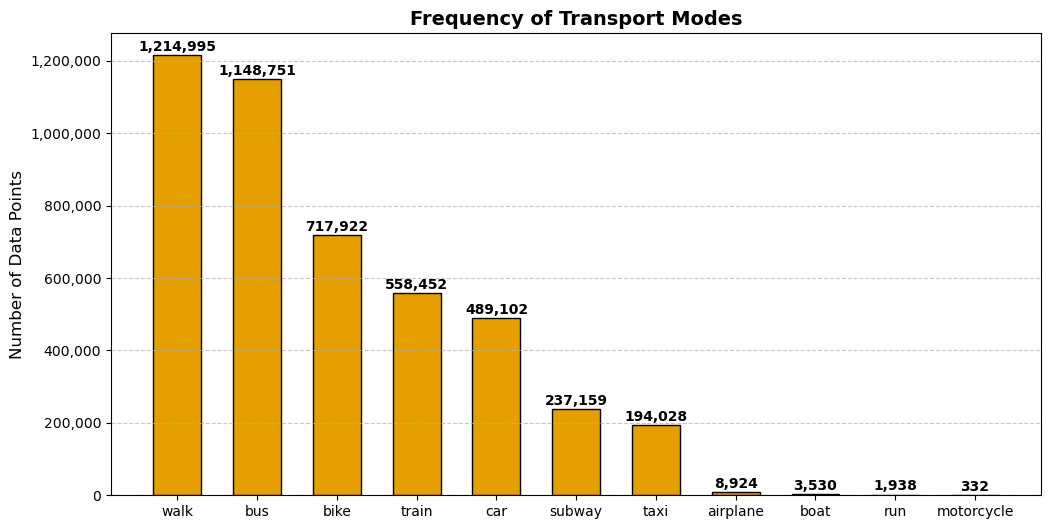

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Count occurrences of each transport mode
label_counts = df['label'].value_counts()

# Set figure size
plt.figure(figsize=(12, 6))

# Create a bar chart instead of a histogram
plt.bar(label_counts.index, label_counts.values, color='#E69F00', edgecolor='black', width=0.6)

# Add title and labels
plt.title('Frequency of Transport Modes', fontsize=14, fontweight='bold')
plt.ylabel('Number of Data Points', fontsize=12)

# Format y-axis to show real numbers instead of scientific notation
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Adjust label height by adding a **5% offset** of the maximum value
for i, count in enumerate(label_counts.values):
    plt.text(i, count + 0.01 * max(label_counts.values), f"{count:,}", 
             ha='center', fontsize=10, fontweight='bold')

# Ensure correct x-axis labels
plt.xticks(rotation=0, fontsize=10)  # Keep labels readable
plt.yticks(fontsize=10)

# Show grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.savefig('Graphs/histogram.png', dpi=600, bbox_inches="tight")
plt.show()



In [42]:
print(df)

           lat         lon          alt  elapsed time                time  \
137  39.948120  116.303378     0.000000  39535.367118 2008-03-28 08:48:39   
138  39.948110  116.303418     0.000000  39535.367153 2008-03-28 08:48:42   
139  39.947997  116.303410     0.000000  39535.367222 2008-03-28 08:48:48   
140  39.947952  116.303377     0.000000  39535.367280 2008-03-28 08:48:53   
141  39.947902  116.303405     0.000000  39535.367338 2008-03-28 08:48:58   
..         ...         ...          ...           ...                 ...   
55   39.984650  116.182117  1158.136483  39374.292743 2007-10-19 07:01:33   
634  39.892085  116.328959   149.924311  40608.471354 2011-03-06 11:18:45   
635  39.892074  116.328959   149.293596  40608.471412 2011-03-06 11:18:50   
636  39.892064  116.328959   149.058396  40608.471470 2011-03-06 11:18:55   
637  39.892055  116.328960   148.956555  40608.471528 2011-03-06 11:19:00   

             trajectory label  user  segment  distance     speed  time_diff

In [43]:
# Get the first 20 rows of the dataset
first_20_rows = df.head(20)

# Save the first 20 rows to a new CSV file
# Replace 'first_20_rows.csv' with the desired file name
first_20_rows.to_csv('Graphs/first_20_rows.csv', index=False)

TypeError: ufunc 'floor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''